In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd+
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os
import matplotlib.image as mpimg

In [2]:
path = 'D:\\train'
classes = os.listdir(path)
classes


['acne', 'eczema', 'psoriasis']

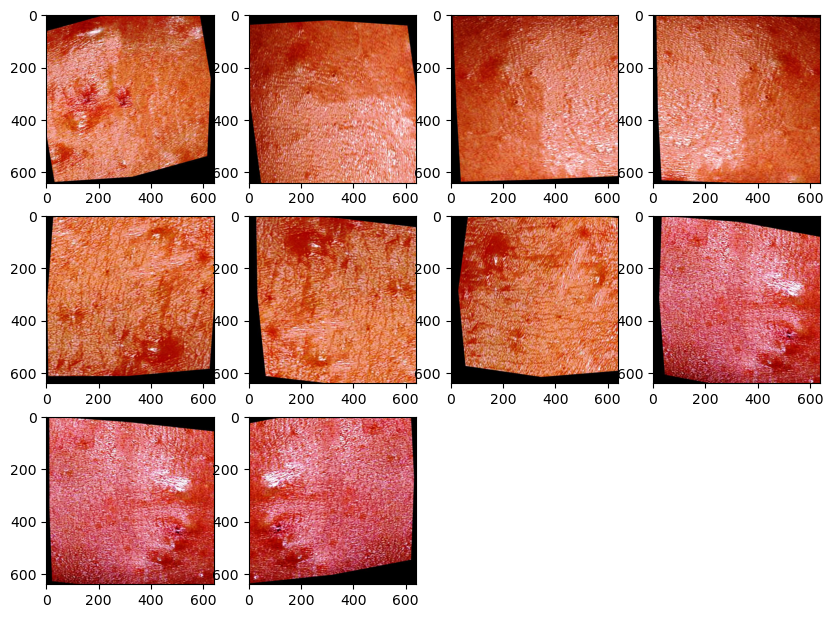

In [3]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
acne_dir = os.path.join('D:\\train\\acne')
eczema_dir = os.path.join('D:\\train\\eczema')
psoriasis_dir = os.path.join('D:\\train\\psoriasis')
acne_names = os.listdir(acne_dir)
eczema_names = os.listdir(eczema_dir)
psoriasis_names = os.listdir(psoriasis_dir)
pic_index = 210
acne_images = [os.path.join(acne_dir, fname)
 for fname in acne_names[pic_index-10:pic_index]]
eczema_images = [os.path.join(eczema_dir, fname)
 for fname in eczema_names[pic_index-10:pic_index]]
psoriasis_images = [os.path.join(psoriasis_dir, fname)
 for fname in psoriasis_names[pic_index-10:pic_index]]
for i, img_path in enumerate(acne_images):
 sp = plt.subplot(4, 4, i+1)
 sp.axis('on')
 img = mpimg.imread(img_path)
 plt.imshow(img)
plt.show()
                        

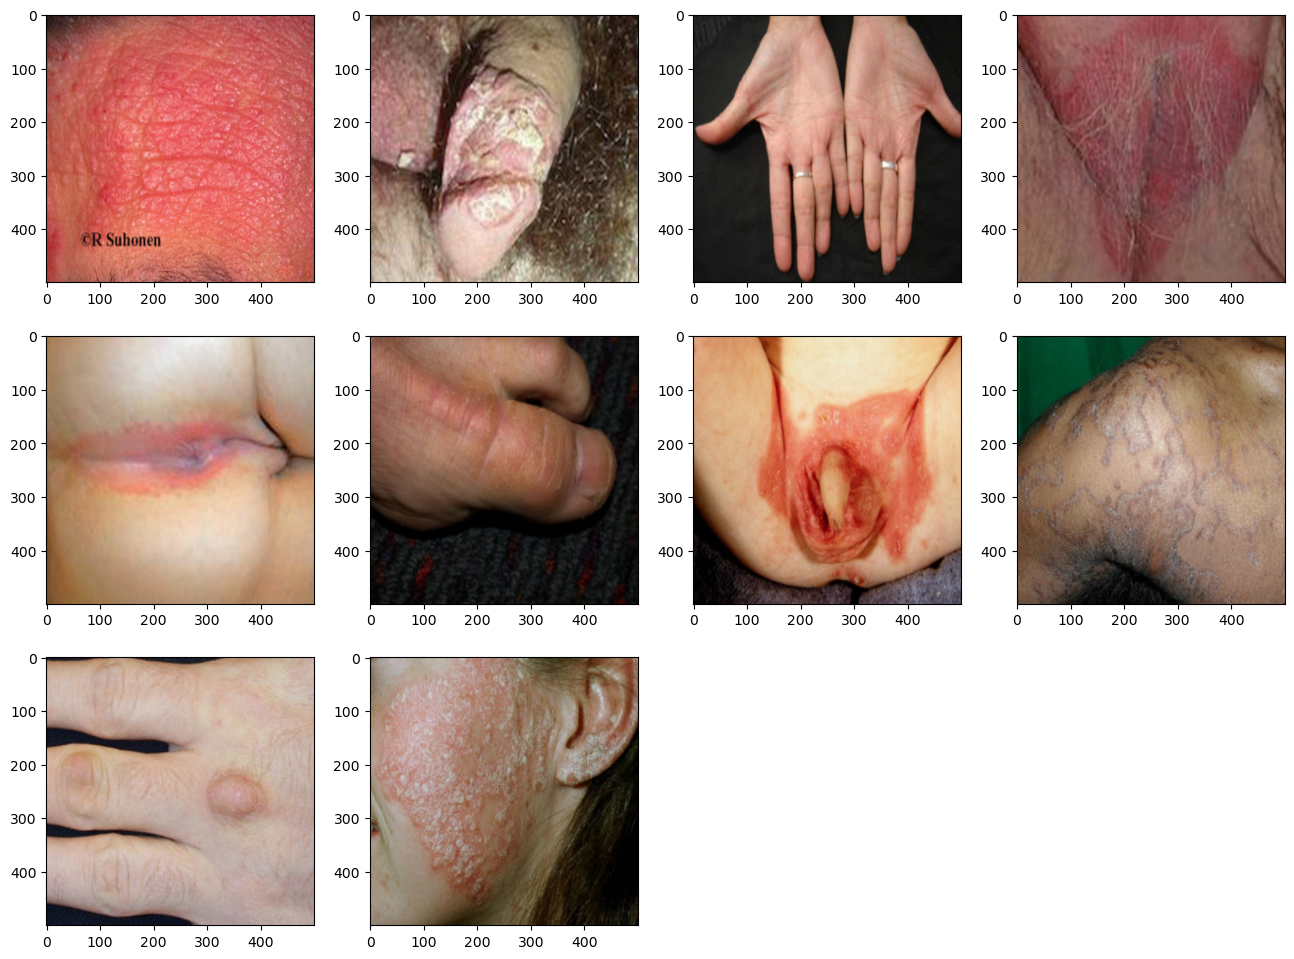

In [9]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
for i, img_path in enumerate(psoriasis_images ):
 sp = plt.subplot(4, 4, i+1)
 sp.axis('On')
 img = mpimg.imread(img_path)
 plt.imshow(img)
plt.show()

In [13]:
base_dir = 'D:\\train'
# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
 image_size=(200,200),
 subset='training',
 seed = 1,
 validation_split=0.1,
 batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
 image_size=(200,200),
 subset='validation',
 seed = 1,
 validation_split=0.1,
 batch_size= 32)

Found 3464 files belonging to 3 classes.
Using 3118 files for training.
Found 3464 files belonging to 3 classes.
Using 346 files for validation.


In [15]:
model = tf.keras.models.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
 layers.MaxPooling2D(2, 2),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D(2, 2),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D(2, 2),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D(2, 2),
 layers.Flatten(),
 layers.Dense(512, activation='relu'),
 layers.BatchNormalization(),
 layers.Dense(512, activation='relu'),
 layers.Dropout(0.1),
 layers.BatchNormalization(),
 layers.Dense(512, activation='relu'),
 layers.Dropout(0.2),
 layers.BatchNormalization(),
 layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,902,529 (14.89 MB)

 Trainable params: 3,899,457 (14.88 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [17]:
model.compile(
 loss='binary_crossentropy',
 optimizer='adam',
 metrics=['accuracy']
)


In [19]:
history = model.fit(train_datagen,
 epochs=6,
 validation_data=test_datagen)

Epoch 1/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 38s 324ms/step - accuracy: 0.7473 - loss: -2.9671 - val_accuracy: 0.4913 - val_loss: 7.0224
Epoch 2/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 297ms/step - accuracy: 0.7573 - loss: -11.9553 - val_accuracy: 0.5723 - val_loss: -2.0670
Epoch 3/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 292ms/step - accuracy: 0.7780 - loss: -27.8796 - val_accuracy: 0.7052 - val_loss: -52.3705
Epoch 4/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 301ms/step - accuracy: 0.7717 - loss: -51.0412 - val_accuracy: 0.7977 - val_loss: -144.4308
Epoch 5/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 28s 289ms/step - accuracy: 0.7878 - loss: -81.6033 - val_accuracy: 0.4509 - val_loss: -31.6573
Epoch 6/6
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 296ms/step - accuracy: 0.7841 - loss: -115.4427 - val_accuracy: 0.6850 - val_loss: -228.8927


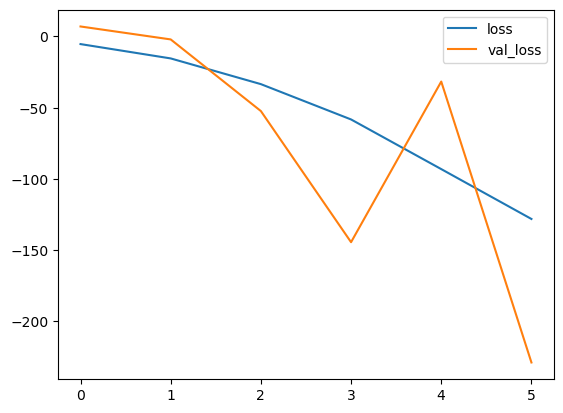

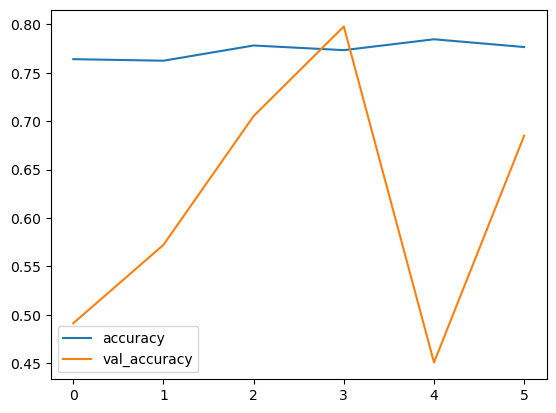

In [20]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
acne


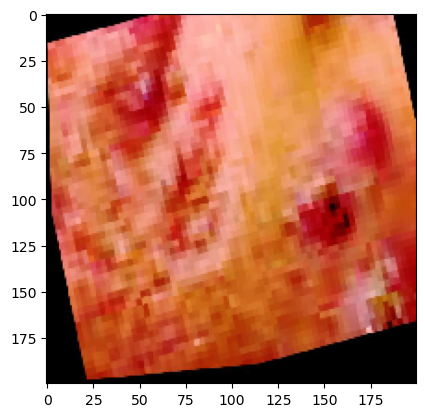

In [25]:
from keras.preprocessing import image
#Input image
test_image = image.load_img('D:\\train\\acne\\19_jpg.rf.870758cefd08065dea1ec2a99e0b374f.jpg', target_size=(200, 200))
#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)
# Result array
result = model.predict(test_image)
#Mapping result array with the main name list
i=0
if(result>=0.10):
 print("eczmea")
if(result<=0.4):
 print("acne")
else:
 print("psoriasis")